# Chicago COVID 19 Data Analysis

*This project will analyze COVID 19 data rolled out by **Chicago Open Data** from **2020 - 2023***

The dataset I have used is linked here: [COVID 19 Dataset](https://data.cityofchicago.org/Health-Human-Services/COVID-19-Daily-Cases-Deaths-and-Hospitalizations/naz8-j4nc)

<br>

## Questions


#### Trends Over Time

1. What are the trends in cases from 2020 - 2023? 
2. What months in each year saw the highest spikes in cases and deaths?
3. What is the ratio of reported deaths to reported cases each year?

#### Age Group Analysis

1. Which age group has the highest number of cases? I hypothesize that children from 0-17 have the lowest # of cases.
2. Which age group has the highest number of deaths? Based on research, I hypothesize that older age groups have higher death counts.

#### Hospitilizations 

1. Is there a certain sex that was more prone to hospitilizations?
2. Which race saw the most hospitilizations?


## Notebook Content

<br>

1. Install Libraries and importing the dataset
2. Exploring the Data
3. Data Cleaning and Preprocessing
4. Data Analysis + Visualization
5. **Chicago COVID 19 Data Analysis Results and findings**

## Step 1: Install Libraries

In [66]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjusts configuration of the plots we will create

In [67]:
# Read the csv file
df = pd.read_csv(r"C:\Users\khang\Downloads\COVID-19_Daily_Cases__Deaths__and_Hospitalizations.csv")

## Step 2: Exploring the Data

In [69]:
# View data
df.head()

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
0,06/17/2023,25,0,1.0,2,2,3,3,6,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,08/04/2020,369,2,32.0,50,105,69,53,39,33,...,0.0,18.0,14.0,0.0,9.0,2.0,15.0,5.0,1.0,0.0
2,07/13/2023,45,0,1.0,6,8,13,8,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,06/11/2022,530,1,27.0,72,102,113,86,68,44,...,0.0,12.0,15.0,0.0,4.0,2.0,14.0,7.0,0.0,0.0
4,03/23/2023,264,2,19.0,69,37,36,28,30,40,...,0.0,10.0,9.0,0.0,8.0,0.0,8.0,3.0,0.0,0.0


Here's what we can tell by looking at the dataframe:

- There are over 58 total columns
- There are over 1300 records 
- There are columns for total cases, deaths, and hospitilzations per day
- Each record is divided into one day

Keep in mind that these are officially reported numbers. The actual number of cases & deaths may be higher, as not all cases are diagnosed. 

We can view some basic information about the data frame using the `.info` method.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1362 entries, 0 to 1361
Data columns (total 58 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Date                                       1361 non-null   object 
 1   Cases - Total                              1362 non-null   int64  
 2   Deaths - Total                             1362 non-null   int64  
 3   Hospitalizations - Total                   1357 non-null   float64
 4   Cases - Age 0-17                           1362 non-null   int64  
 5   Cases - Age 18-29                          1362 non-null   int64  
 6   Cases - Age 30-39                          1362 non-null   int64  
 7   Cases - Age 40-49                          1362 non-null   int64  
 8   Cases - Age 50-59                          1362 non-null   int64  
 9   Cases - Age 60-69                          1362 non-null   int64  
 10  Cases - Age 70-79       

Immediately looking at the data types, we must change date to a datetime dtype. 

There are also columns that most likely won't be used for the analysis including every column that is unknown for the specific metric.

Let's get a brief statistical summary on the columns now.

In [9]:
# Get statistical summary

df.describe()

,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,...,Hospitalizations - Age Unknown,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Unknown Gender,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity
count,1362.000000,1362.000000,1357.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,...,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000,1357.000000
mean,583.419971,6.032305,40.350037,96.101322,128.198238,113.034508,83.215125,69.763583,49.455213,26.758443,...,0.011054,20.257922,20.086220,0.005895,9.984525,1.196021,17.988946,8.496684,1.715549,0.968312
std,931.122863,9.357563,46.158927,188.913911,224.105889,188.922797,132.022063,104.882825,68.954370,32.790134,...,0.104593,22.606218,24.100773,0.076583,13.474018,2.137228,21.284435,8.974695,2.664943,1.435341
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166.000000,1.000000,16.000000,20.000000,30.000000,26.250000,22.000000,20.000000,16.000000,9.000000,...,0.000000,8.000000,7.000000,0.000000,3.000000,0.000000,6.000000,3.000000,0.000000,0.000000
50%,364.000000,2.000000,28.000000,52.000000,71.000000,67.000000,48.000000,41.000000,30.000000,17.000000,...,0.000000,14.000000,13.000000,0.000000,6.000000,1.000000,12.000000,6.000000,1.000000,1.000000
75%,621.500000,6.000000,44.000000,102.750000,139.000000,124.000000,93.000000,77.000000,59.000000,34.750000,...,0.000000,23.000000,22.000000,0.000000,11.000000,2.000000,21.000000,10.000000,2.000000,1.000000
max,10423.000000,58.000000,804.000000,2816.000000,2294.000000,2008.000000,1394.000000,1115.000000,741.000000,333.000000,...,1.000000,389.000000,415.000000,1.000000,239.000000,55.000000,279.000000,170.000000,40.000000,21.000000


Looking at this summary, we can immediately make note of some things:

- The most cases in a day was 10423
- Age group 30-39 had the most average cases
- males and females had about the same number of hospitilizations
- Black Non-Latinx had the highest average hospitalizations

I hypothesized that older age groups were more prone to contracting the virus, however middle age people seem to have the highest average. Perhaps the death rate is still higher for older age groups, we will have to investigate further.

I hypothesize that the reason Black Non-Latinx has the most hospitilzations is because of the **city's population demographic** and **not because of a genetic reason** that would make them somehow more susceptible to COVID 19.

In [10]:
# Look at all death columns

death_df = df.filter(like='Death')

In [11]:
death_df.describe()

,Deaths - Total,Deaths - Age 0-17,Deaths - Age 18-29,Deaths - Age 30-39,Deaths - Age 40-49,Deaths - Age 50-59,Deaths - Age 60-69,Deaths - Age 70-79,Deaths - Age 80+,Deaths - Age Unknown,Deaths - Female,Deaths - Male,Deaths - Unknown Gender,Deaths - Latinx,Deaths - Asian Non-Latinx,Deaths - Black Non-Latinx,Deaths - White Non-Latinx,Deaths - Other Race Non-Latinx,Deaths - Unknown Race/Ethnicity
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.0,1362.000000,1362.000000,1362.0,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,6.032305,0.006608,0.049192,0.148311,0.339207,0.697504,1.280470,1.484581,2.026432,0.0,2.577827,3.454479,0.0,1.748899,0.258443,2.503671,1.443465,0.063877,0.013950
std,9.357563,0.081050,0.226308,0.437111,0.746919,1.272374,2.291867,2.552631,3.508471,0.0,4.085804,5.610534,0.0,3.217344,0.655631,4.209126,2.290469,0.275690,0.117327
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,0.0,3.000000,4.000000,0.0,2.000000,0.000000,3.000000,2.000000,0.000000,0.000000
max,58.000000,1.000000,2.000000,4.000000,5.000000,8.000000,15.000000,17.000000,29.000000,0.0,27.000000,35.000000,0.0,26.000000,5.000000,27.000000,16.000000,2.000000,1.000000


Based on this summary, we can already see that age groups from 60-8-+ see higher death rates on average than lower age groups. It seems as if the older the age, the higher chance of death, but we will investigate further.

## Data Cleaning and Preprocessing

Before analyzing the data, multiple steps have to be taken to clean the data:

- Handle missing values
- Change date to a datetime dtype.
- Seperate each date value into seperate columns (year, month, day, weekday)
- Drop 'Unknown' columns
- Finding duplicates and dropping them

### Handling Missing Values

Locate where in the data resides missing values and handle them accordingly

In [12]:
df.isnull().sum()

Date                                         1
Cases - Total                                0
Deaths - Total                               0
Hospitalizations - Total                     5
Cases - Age 0-17                             0
Cases - Age 18-29                            0
Cases - Age 30-39                            0
Cases - Age 40-49                            0
Cases - Age 50-59                            0
Cases - Age 60-69                            0
Cases - Age 70-79                            0
Cases -  Age 80+                             0
Cases - Age Unknown                          0
Cases - Female                               0
Cases - Male                                 0
Cases - Unknown Gender                       0
Cases - Latinx                               0
Cases - Asian Non-Latinx                     0
Cases - Black Non-Latinx                     0
Cases - White Non-Latinx                     0
Cases - Other Race Non-Latinx                0
Cases - Unkno

We can see above that there are little null values in the data, however we should still check and see if they need to be handled

In [13]:
# The .any(axis=1) method checks if any value in each row is null
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

           Date  Cases - Total  Deaths - Total  Hospitalizations - Total  \
242  07/09/2023             24               0                       NaN   
751  11/18/2023            117               0                       NaN   
778         NaN           1605               0                     804.0   
789  11/21/2023             67               0                       NaN   
849  11/19/2023             98               0                       NaN   
887  11/20/2023            156               0                       NaN   

     Cases - Age 0-17  Cases - Age 18-29  Cases - Age 30-39  \
242                 2                  5                  7   
751                23                 14                 16   
778               257                302                258   
789                 9                  8                 12   
849                13                  8                 15   
887                22                 14                 20   

     Cases - Age 40-49  C

We can now see each row that includes a null value.

I will  drop any rows with null values for ease of analysis and since there are little null values within each columns

In [14]:
df = df.dropna()

In [15]:
# Check if null values have been dropped
df.shape

(1356, 58)

### Change Date to a datetime dtype

The data type of date is currently `object`, so Pandas does not know that this column is a date. We can convert it into a `datetime` column using the `pd.to_datetime` method.

In [16]:
df['Date'] = pd.to_datetime(df.Date)

C:\Users\khang\AppData\Local\Temp\ipykernel_62124\242903854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.Date)


In [17]:
df.Date

0      2023-06-17
1      2020-08-04
2      2023-07-13
3      2022-06-11
4      2023-03-23
          ...    
1357   2022-01-28
1358   2020-06-03
1359   2021-05-15
1360   2021-11-05
1361   2021-06-07
Name: Date, Length: 1356, dtype: datetime64[ns]

The data type has now been changed to 'datetime64'

### Seperate Each Date Value Into Seperate Columns (year, month, day, weekday)

We can now extract different parts of the data into separate columns, using the `DatetimeIndex` class

In [18]:
df['year'] = pd.DatetimeIndex(df.Date).year
df['month'] = pd.DatetimeIndex(df.Date).month
df['day'] = pd.DatetimeIndex(df.Date).day
df['weekday'] = pd.DatetimeIndex(df.Date).weekday

C:\Users\khang\AppData\Local\Temp\ipykernel_62124\4176331732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.DatetimeIndex(df.Date).year
C:\Users\khang\AppData\Local\Temp\ipykernel_62124\4176331732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df.Date).month
C:\Users\khang\AppData\Local\Temp\ipykernel_62124\4176331732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [19]:
# Change these columns from object dtypes to int dtypes
df['year'] = df['year'].astype('int')
df['month'] = df['month'].astype('int')
df['day'] = df['day'].astype('int')
df['weekday'] = df['weekday'].astype('int')

C:\Users\khang\AppData\Local\Temp\ipykernel_62124\1441616466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype('int')
C:\Users\khang\AppData\Local\Temp\ipykernel_62124\1441616466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['month'].astype('int')
C:\Users\khang\AppData\Local\Temp\ipykernel_62124\1441616466.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [20]:
df.head()

,Date,Cases - Total,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,Hospitalizations - Unknown Race/Ethnicity,year,month,day,weekday
0,2023-06-17,25,0,1.0,2,2,3,3,6,3,...,0.0,0.0,0.0,0.0,1.0,0.0,2023,6,17,5
1,2020-08-04,369,2,32.0,50,105,69,53,39,33,...,9.0,2.0,15.0,5.0,1.0,0.0,2020,8,4,1
2,2023-07-13,45,0,1.0,6,8,13,8,3,3,...,0.0,0.0,1.0,0.0,0.0,0.0,2023,7,13,3
3,2022-06-11,530,1,27.0,72,102,113,86,68,44,...,4.0,2.0,14.0,7.0,0.0,0.0,2022,6,11,5
4,2023-03-23,264,2,19.0,69,37,36,28,30,40,...,8.0,0.0,8.0,3.0,0.0,0.0,2023,3,23,3


The Date column has now been changed to Datetime dtype, and split into multiple columns

### Drop unknown columns

The data includes columns that do not have further information on the specific record. These columns include:

- Cases - Age Unknown
- Cases - Unknown Gender
- Cases - Unknown Race/Ethnicity
- Deaths - Age Unknown
- Deaths - Unknown Gender
- Deaths - Unknown Race/Ethnicity
- Hospitilzations - Age Unkown
- Hospitilizations - Unknown Gender
- Hospitilizations - Unknown Race/Ethnicity

We can complete this using the 'del'

In [21]:
# Create a function that removes any columns with the phrase 'Unknown'
for col in df.columns:
    if 'Unknown' in col:
        del df[col]

In [22]:
# Check if function worked properly
df.filter(like='Unknown')

""
0
1
2
3
4
...
1357
1358
1359
1360


The columns have been successfully deleted

### Finding Duplicates and Dropping Them

If any duplicates are found in the data, drop the records

In [23]:
# First check the count of rows in dateframe
df.shape

(1356, 53)

In [24]:
# .dupicated() allows us to see which rows are duplicated
duplicate_rows = df.duplicated()

In [25]:
# Total up the amount of duplicates
duplicate_rows.sum()

0

0 duplicate records reside in the data, no other manipulation needs to be done.

## Data Analysis + Visualization

After cleaning the dataframe, we can now answer our various analyses and visualize them for better understanding

The analyses will be divided in such: 

#### Trends Over Time

1. What are the trends in cases from 2020 - 2023?
2. What months in each year saw the highest spikes in cases and deaths?
3. What is the ratio of reported deaths to reported cases for each year?

#### Age Group Analysis

1. Which age group has the highest number of cases? I hypothesize that children from 0-17 have the lowest # of cases.
2. Which age group has the highest number of deaths? Based on research, I hypothesize that older age groups have higher death counts.

#### Hospitilizations 

1. Is there a certain sex that was more prone to hospitilizations?
2. Which race saw the most hospitilizations?



### Trends Over Time

1. What are the trends in cases from 2020 - 2023?
2. What months in each year saw the highest spikes in cases and deaths?
3. What is the ratio of reported deaths to reported cases for each year?

#### What are the trends in cases from 2020 - 2023?

In [63]:
# Rename Cases - Total column for ease of use
df.rename(columns = {'Cases - Total': 'total_cases'}, inplace = True) 

C:\Users\khang\AppData\Local\Temp\ipykernel_62124\1794314038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Cases - Total': 'total_cases'}, inplace = True)


In [27]:
# Group total cases by year using .groupby() method
yearly_groups_df = df.groupby('year')[['total_cases']].sum()
yearly_groups_df

,total_cases
year,
2020,208855
2021,249375
2022,280874
2023,53447


After grouping the records by each year, we can see which year saw the most cases

In this data, **2022** saw the most cases per year

We can visualize this data using matplotlib/seaborn for a better understanding

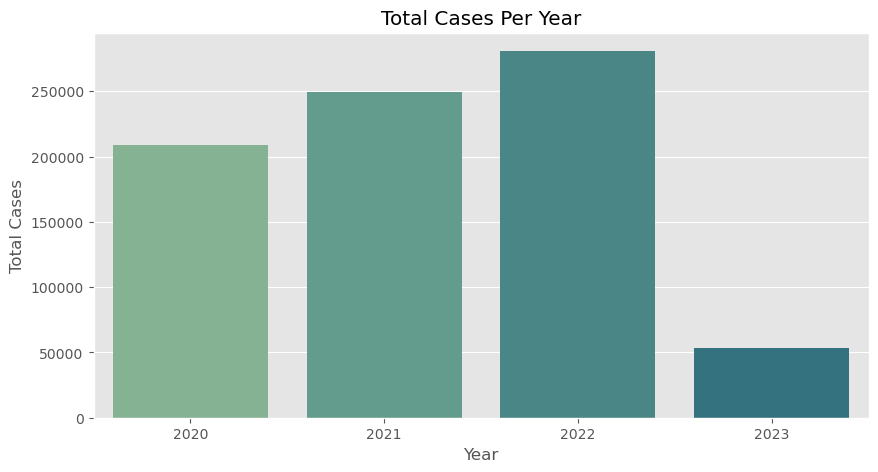

In [64]:
# Create a bar chart displaying trends in cases from 2020-2023
plt.figure(figsize=(10,5))
sns.set_palette("crest")
sns.barplot(x=yearly_groups_df.index, y=yearly_groups_df.total_cases, data=yearly_groups_df);

plt.title('Total Cases Per Year')
plt.xlabel('Year')
plt.ylabel('Total Cases');

#### What months in each year saw the highest spikes in cases and deaths?

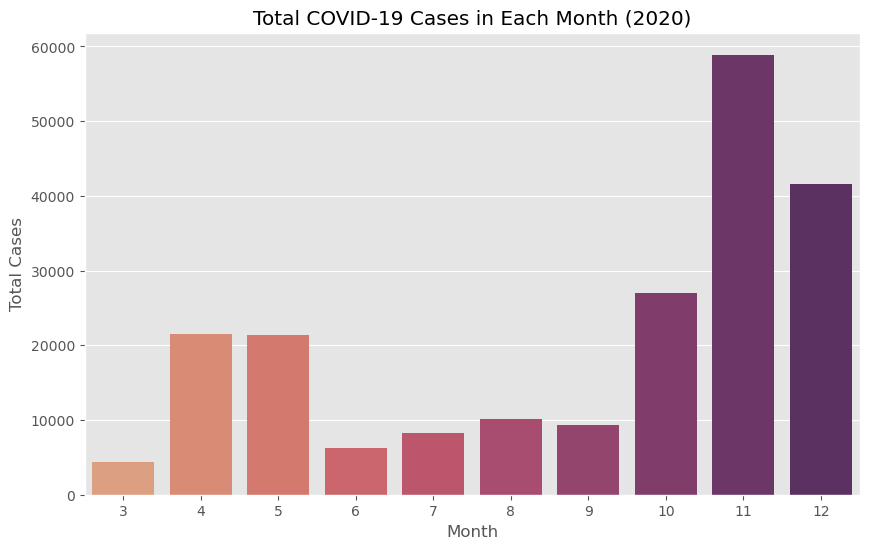

In [29]:
# Create bar chart for cases in 2020
monthly_cases_2020 = df[df['year'] == 2020].groupby('month')['total_cases'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=monthly_cases_2020, palette='flare')
plt.title('Total COVID-19 Cases in Each Month (2020)')
plt.xlabel('Month')
plt.ylabel('Total Cases');

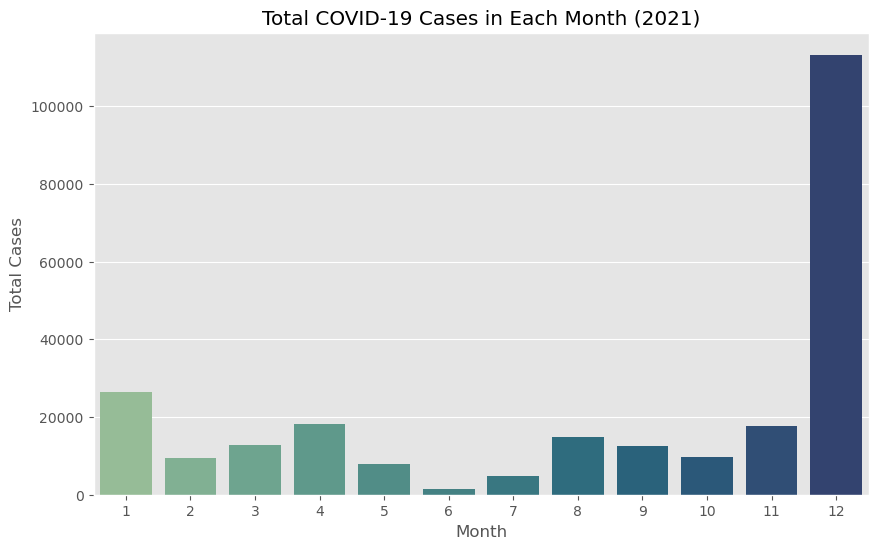

In [30]:
# Create bar chart for cases in 2021
monthly_cases_2021 = df[df['year'] == 2021].groupby('month')['total_cases'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=monthly_cases_2021, palette='crest')
plt.title('Total COVID-19 Cases in Each Month (2021)')
plt.xlabel('Month')
plt.ylabel('Total Cases');

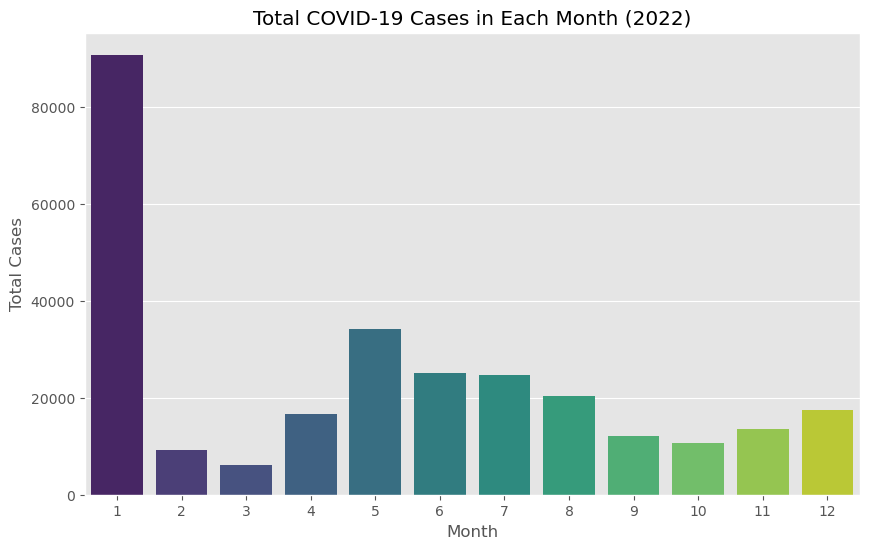

In [31]:
# Create bar chart for cases in 2022
monthly_cases_2022 = df[df['year'] == 2022].groupby('month')['total_cases'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=monthly_cases_2022, palette='viridis')
plt.title('Total COVID-19 Cases in Each Month (2022)')
plt.xlabel('Month')
plt.ylabel('Total Cases');

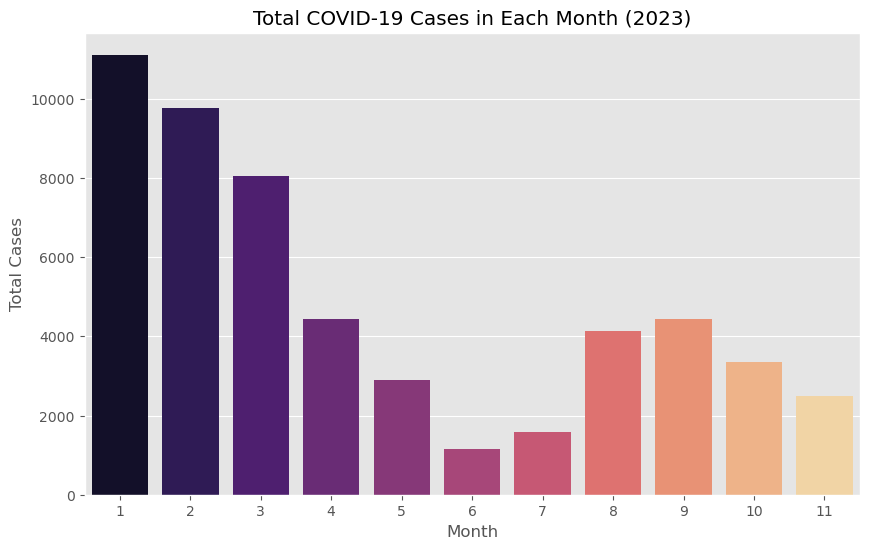

In [32]:
# Create bar chart for cases in 2023
monthly_cases_2023 = df[df['year'] == 2023].groupby('month')['total_cases'].sum().reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_cases', data=monthly_cases_2023, palette='magma')
plt.title('Total COVID-19 Cases in Each Month (2023)')
plt.xlabel('Month')
plt.ylabel('Total Cases');

## Plotting multiple charts in a grid

Use `plt.subplots`, which returns a set of axes for plotting. 

Here's a single grid showing the bar charts for every month in each year.

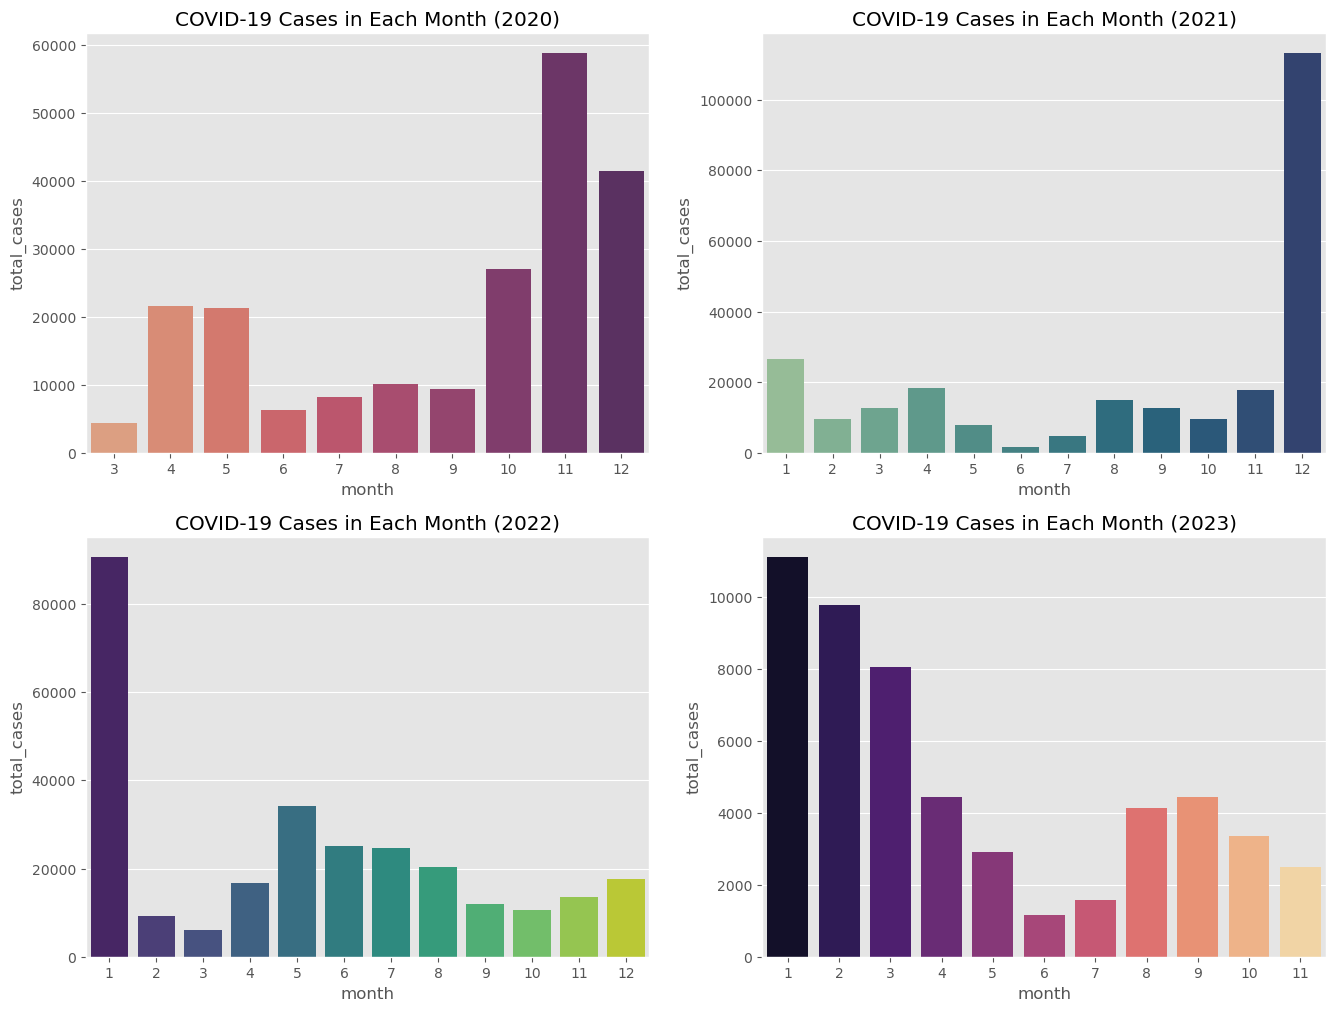

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16,12));

# Use first axes to plot 2020 barchart
axes[0,0].set_title('COVID-19 Cases in Each Month (2020)')
sns.barplot(x='month', y='total_cases', 
            data=monthly_cases_2020, 
            palette='flare',
            ax=axes[0,0])

# Use second axes to plot 2021 barchart
axes[0,1].set_title('COVID-19 Cases in Each Month (2021)')
sns.barplot(x='month', y='total_cases', 
            data=monthly_cases_2021, 
            palette='crest',
            ax=axes[0,1])

# Use second axes to plot 2022 barchart
axes[1,0].set_title('COVID-19 Cases in Each Month (2022)')
sns.barplot(x='month', y='total_cases', 
            data=monthly_cases_2022, 
            palette='viridis',
            ax=axes[1,0])

# Use second axes to plot 2023 barchart
axes[1,1].set_title('COVID-19 Cases in Each Month (2023)')
sns.barplot(x='month', y='total_cases', 
            data=monthly_cases_2023, 
            palette='magma',
            ax=axes[1,1]);

#### What is the ratio of reported deaths to reported cases for each year?

In [34]:
# Create ratio of deaths to cases for each year
death_rate_2020 = df[df['year'] == 2020].groupby('year')['Deaths - Total'].sum() / df[df['year'] == 2020].groupby('year')['total_cases'].sum()
death_rate_2021 = df[df['year'] == 2021].groupby('year')['Deaths - Total'].sum() / df[df['year'] == 2021].groupby('year')['total_cases'].sum()
death_rate_2022 = df[df['year'] == 2022].groupby('year')['Deaths - Total'].sum() / df[df['year'] == 2022].groupby('year')['total_cases'].sum()
death_rate_2023 = df[df['year'] == 2023].groupby('year')['Deaths - Total'].sum() / df[df['year'] == 2023].groupby('year')['total_cases'].sum()

# Print the death ratio 
print('The death ratio in 2020 was {:.2%}.'.format(death_rate_2020.iloc[0]))
print('The death ratio in 2021 was {:.2%}.'.format(death_rate_2021.iloc[0]))
print('The death ratio in 2022 was {:.2%}.'.format(death_rate_2022.iloc[0]))
print('The death ratio in 2023 was {:.2%}.'.format(death_rate_2023.iloc[0]))

The death ratio in 2020 was 2.09%.
The death ratio in 2021 was 0.90%.
The death ratio in 2022 was 0.50%.
The death ratio in 2023 was 0.36%.


### Age Group Analysis

1. Which age group has the highest number of cases? I hypothesize that children from 0-17 have the lowest # of cases.
2. Which age group has the highest number of deaths? Based on research, I hypothesize that older age groups have higher death counts.

#### Which age group has the highest number of cases? I hypothesize that children from 0-17 have the lowest # of cases.

In [35]:
df.filter(like='Age')

,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,Cases - Age 70-79,Cases - Age 80+,Deaths - Age 0-17,Deaths - Age 18-29,...,Deaths - Age 70-79,Deaths - Age 80+,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+
0,2,2,3,3,6,3,6,0,0,0,...,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50,105,69,53,39,33,16,4,0,0,...,0,1,0.0,4.0,2.0,6.0,3.0,8.0,7.0,2.0
2,6,8,13,8,3,3,3,1,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,72,102,113,86,68,44,32,13,0,0,...,1,0,1.0,4.0,1.0,1.0,5.0,4.0,5.0,6.0
4,69,37,36,28,30,40,15,9,0,0,...,1,0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,166,146,142,88,71,67,49,18,0,0,...,3,10,0.0,9.0,4.0,3.0,3.0,12.0,12.0,10.0
1358,23,61,47,41,44,32,18,14,0,2,...,9,9,1.0,7.0,5.0,2.0,4.0,15.0,9.0,7.0
1359,38,38,33,19,27,12,6,4,0,0,...,2,3,1.0,4.0,6.0,5.0,13.0,6.0,3.0,6.0
1360,111,103,98,71,44,22,12,10,0,0,...,0,1,0.0,3.0,3.0,4.0,6.0,6.0,3.0,2.0


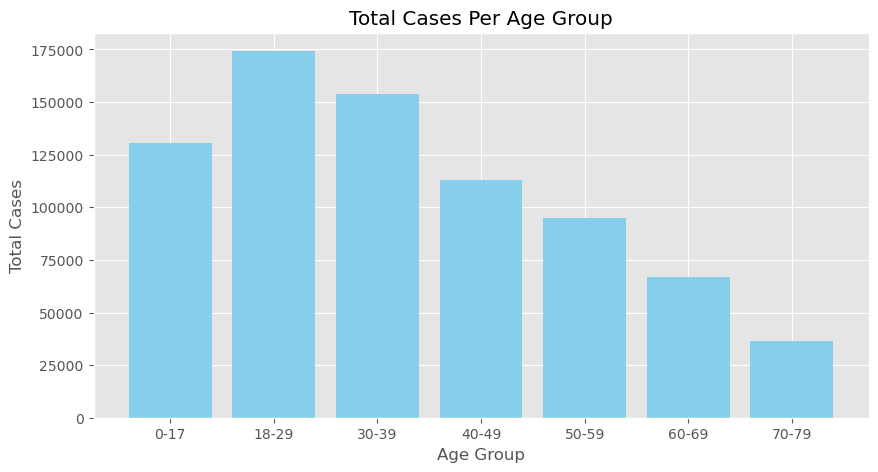

In [57]:
# Create dateframe of total cases for each age group
cases_per_group = df[['Cases - Age 0-17', 
                      'Cases - Age 18-29', 
                      'Cases - Age 30-39', 
                      'Cases - Age 40-49',
                      'Cases - Age 50-59',
                      'Cases - Age 60-69',
                      'Cases - Age 70-79']].sum()

# Create an index shortening the x-values
cases_per_group.index = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create barchart
plt.figure(figsize=(10,5))
plt.bar(cases_per_group.index, cases_per_group, color='skyblue')
plt.title('Total Cases Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Cases');

#### Which age group has the highest number of deaths? Based on research, I hypothesize that older age groups have higher death counts.

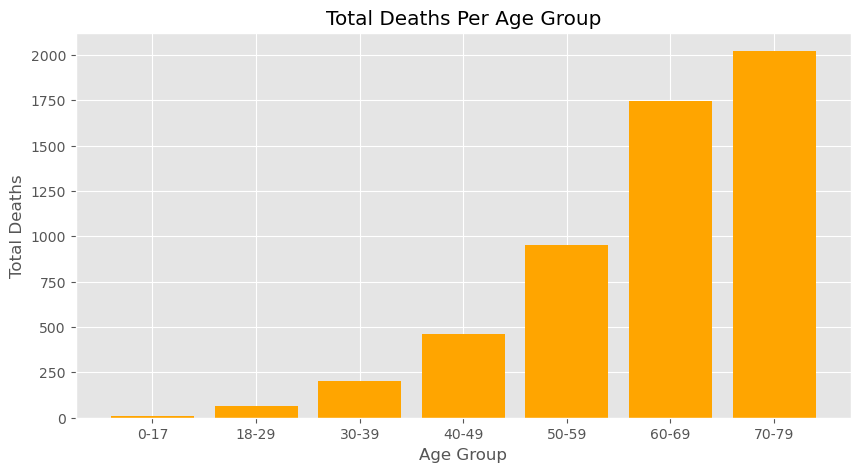

In [58]:
# Create dateframe of total deaths for each age group
deaths_per_group = df[['Deaths - Age 0-17', 
                      'Deaths - Age 18-29', 
                      'Deaths - Age 30-39', 
                      'Deaths - Age 40-49',
                      'Deaths - Age 50-59',
                      'Deaths - Age 60-69',
                      'Deaths - Age 70-79']].sum()

# Create an index shortening the x-values
deaths_per_group.index = ['0-17', '18-29', '30-39', '40-49', '50-59', '60-69', '70-79']

# Create barchart
plt.figure(figsize=(10,5))
plt.bar(deaths_per_group.index, deaths_per_group, color='orange')
plt.title('Total Deaths Per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Deaths');

### Hospitilizations 

1. Is there a certain sex that was more prone to hospitilizations?
2. Which race saw the most hospitilizations?

#### Is there a certain sex that was more prone to hospitilizations?

In [38]:
df.head()

,Date,total_cases,Deaths - Total,Hospitalizations - Total,Cases - Age 0-17,Cases - Age 18-29,Cases - Age 30-39,Cases - Age 40-49,Cases - Age 50-59,Cases - Age 60-69,...,Hospitalizations - Male,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx,year,month,day,weekday
0,2023-06-17,25,0,1.0,2,2,3,3,6,3,...,0.0,0.0,0.0,0.0,0.0,1.0,2023,6,17,5
1,2020-08-04,369,2,32.0,50,105,69,53,39,33,...,14.0,9.0,2.0,15.0,5.0,1.0,2020,8,4,1
2,2023-07-13,45,0,1.0,6,8,13,8,3,3,...,1.0,0.0,0.0,1.0,0.0,0.0,2023,7,13,3
3,2022-06-11,530,1,27.0,72,102,113,86,68,44,...,15.0,4.0,2.0,14.0,7.0,0.0,2022,6,11,5
4,2023-03-23,264,2,19.0,69,37,36,28,30,40,...,9.0,8.0,0.0,8.0,3.0,0.0,2023,3,23,3


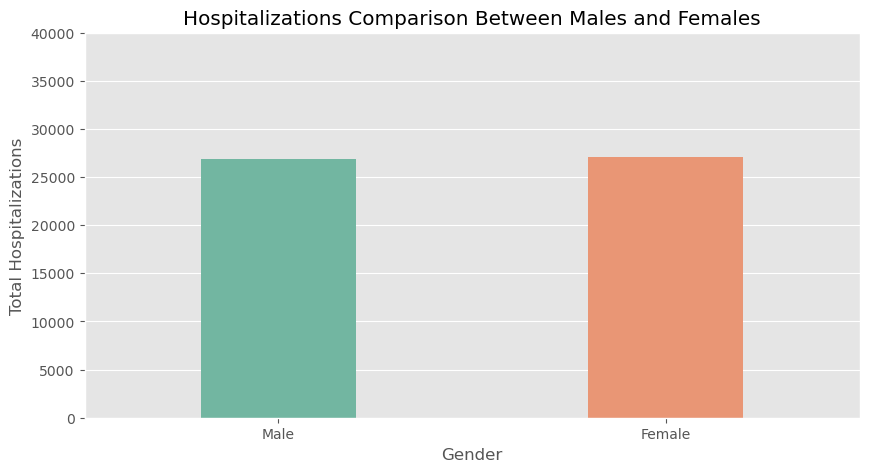

In [61]:
# Create variables for male and female hospitilizations
hospitalizations_df = df[['Hospitalizations - Male', 'Hospitalizations - Female']].sum()

# Create a new DataFrame for plotting
hospitalizations_plot_df = pd.DataFrame({'Gender': ['Male', 'Female'],
                                         'Hospitalizations': hospitalizations_df.values})

# Create a dual bar chart using Seaborn
plt.figure(figsize=(10,5))
sns.barplot(x='Gender', y='Hospitalizations', data=hospitalizations_plot_df, palette='Set2', width=0.4)
plt.title('Hospitalizations Comparison Between Males and Females')
plt.xlabel('Gender')
plt.ylabel('Total Hospitalizations')
plt.ylim(0,40000);

#### Which race saw the most hospitilizations?

In [40]:
df.filter(like='Hospitalizations')

,Hospitalizations - Total,Hospitalizations - Age 0-17,Hospitalizations - Age 18-29,Hospitalizations - Age 30-39,Hospitalizations - Age 40-49,Hospitalizations - Age 50-59,Hospitalizations - Age 60-69,Hospitalizations - Age 70-79,Hospitalizations - Age 80+,Hospitalizations - Female,Hospitalizations - Male,Hospitalizations - Latinx,Hospitalizations - Asian Non-Latinx,Hospitalizations - Black Non-Latinx,Hospitalizations - White Non-Latinx,Hospitalizations - Other Race Non-Latinx
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,32.0,0.0,4.0,2.0,6.0,3.0,8.0,7.0,2.0,18.0,14.0,9.0,2.0,15.0,5.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,27.0,1.0,4.0,1.0,1.0,5.0,4.0,5.0,6.0,12.0,15.0,4.0,2.0,14.0,7.0,0.0
4,19.0,2.0,2.0,3.0,1.0,2.0,2.0,3.0,4.0,10.0,9.0,8.0,0.0,8.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,53.0,0.0,9.0,4.0,3.0,3.0,12.0,12.0,10.0,28.0,25.0,15.0,1.0,16.0,19.0,2.0
1358,50.0,1.0,7.0,5.0,2.0,4.0,15.0,9.0,7.0,23.0,27.0,12.0,0.0,28.0,9.0,0.0
1359,44.0,1.0,4.0,6.0,5.0,13.0,6.0,3.0,6.0,17.0,27.0,13.0,0.0,19.0,10.0,2.0
1360,27.0,0.0,3.0,3.0,4.0,6.0,6.0,3.0,2.0,16.0,11.0,5.0,0.0,11.0,9.0,0.0


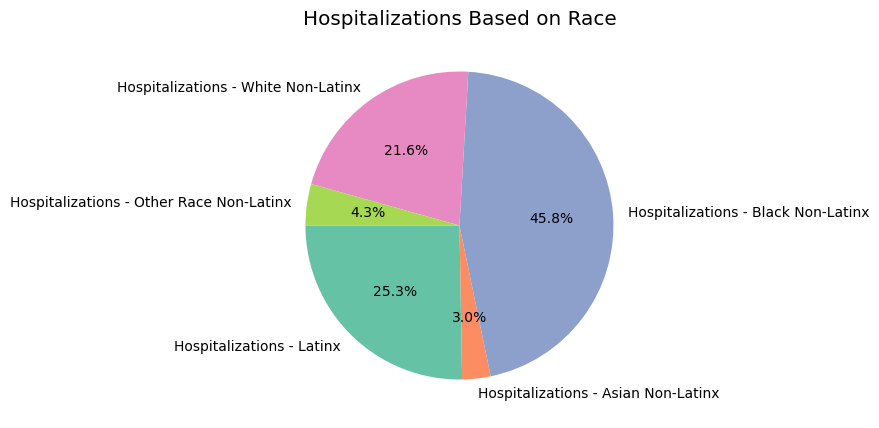

In [62]:
# Create dataframe of the hospitalizations based on race
race_df = df[['Hospitalizations - Latinx',
              'Hospitalizations - Asian Non-Latinx',
              'Hospitalizations - Black Non-Latinx',
              'Hospitalizations - White Non-Latinx',
              'Hospitalizations - Other Race Non-Latinx']].sum()

# Create pie chart to visualize the distribution
plt.figure(figsize=(10,5))
plt.title('Hospitalizations Based on Race')
plt.pie(race_df, labels=race_df.index, autopct='%1.1f%%', startangle=180, colors=sns.color_palette('Set2'));

## Chicago COVID 19 Data Analysis Results and findings

After cleaning and preprocessing the data, creating different analyses, we can now discuss the various findings we discovered.

### Trends Over Time

<br>

**1. What are the trends in cases from 2020 - 2023?**

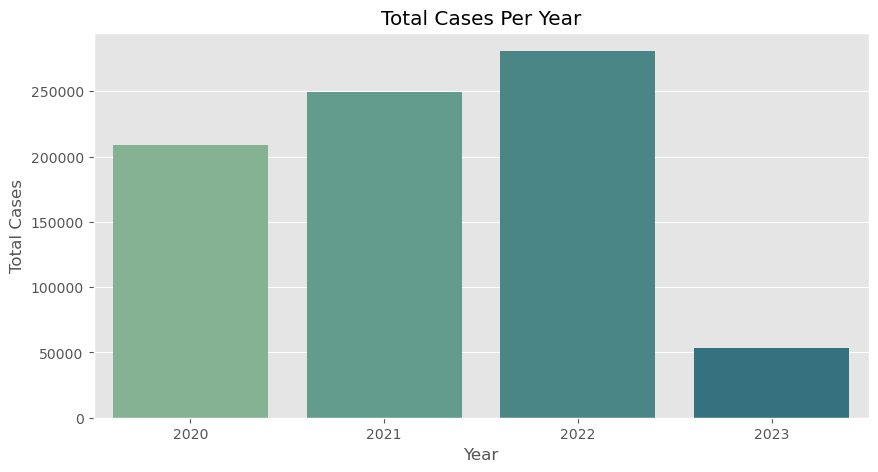

We see a progressive increase in cases as the eyars go on with a large spike in 2022, however there is a very sharp decrease of cases in 2023 due to an increase in vaccinated individuals.

<br><br>

**2. What months in each year saw the highest spikes in cases and deaths?**

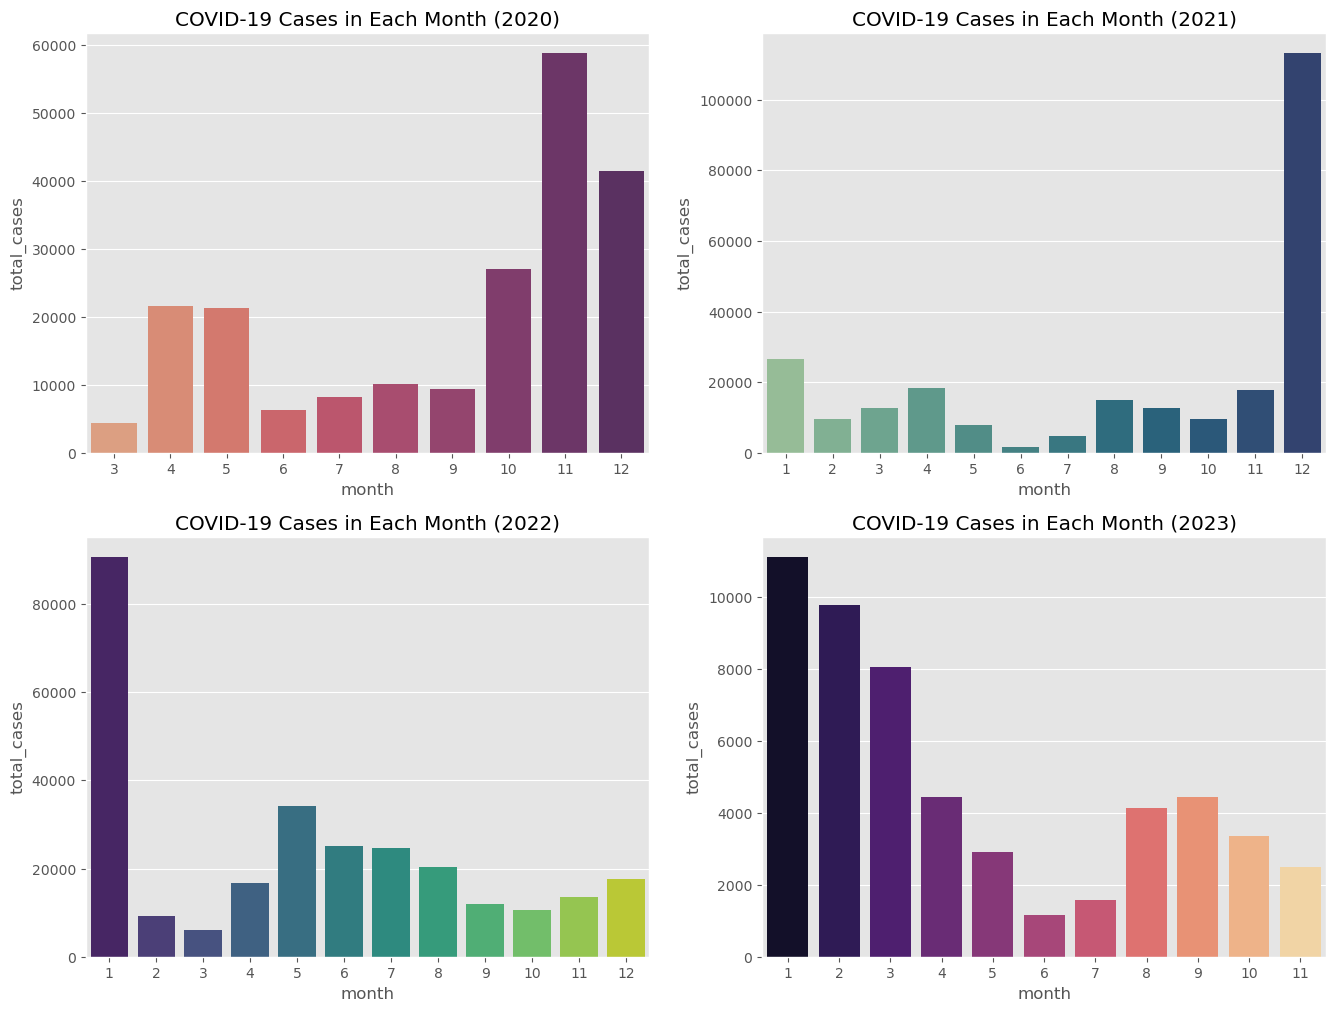

Based on our data, we can see that cases do not get reported until March, 2020, when the rise of Covid-19 occured.

We also see that each year, the end months see the most cases. Typically around **November until January**.

Within the beginning of 2022 towards the end of 2023, cases drop significantly due to the height of vaccinations being distributed to the public.

<br><br>

**3. What is the ratio of reported deaths to reported cases each year?**

* The death ratio in 2020 was 2.09%.
* The death ratio in 2021 was 0.90%.
* The death ratio in 2022 was 0.50%.
* The death ratio in 2023 was 0.36%.

Each year sees a regressive decrease in reported deaths to reported cases due to an increase in vaccinations and public health safety.



### Age Group Analysis

<br>

**1. Which age group has the highest number of cases? I hypothesize that children from 0-17 have the lowest # of cases.**

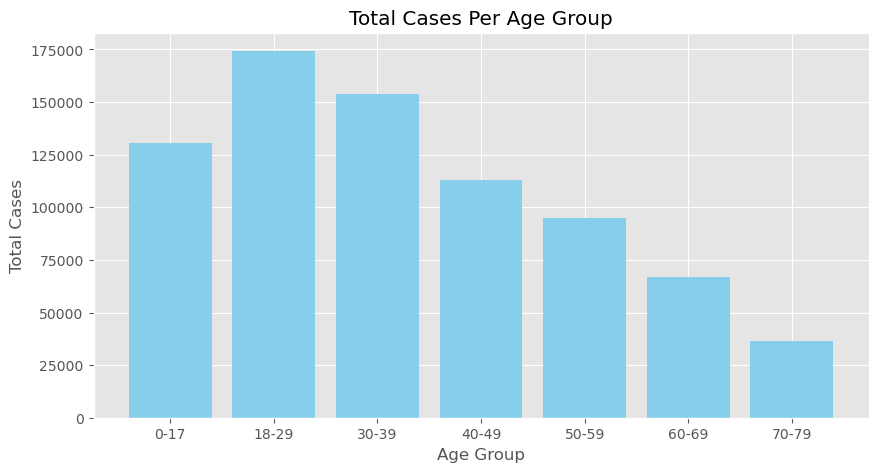

We see here that the **lowest** number of cases are within the 70-79 age range

The **highest** number of cases are within the 18-29 age range.

Ultimately, my hypothesis was incorrect of the 0-17 age range having the lowest age range.

<br><br>

**2. Which age group has the highest number of deaths? Based on research, I hypothesize that older age groups have higher death counts.**

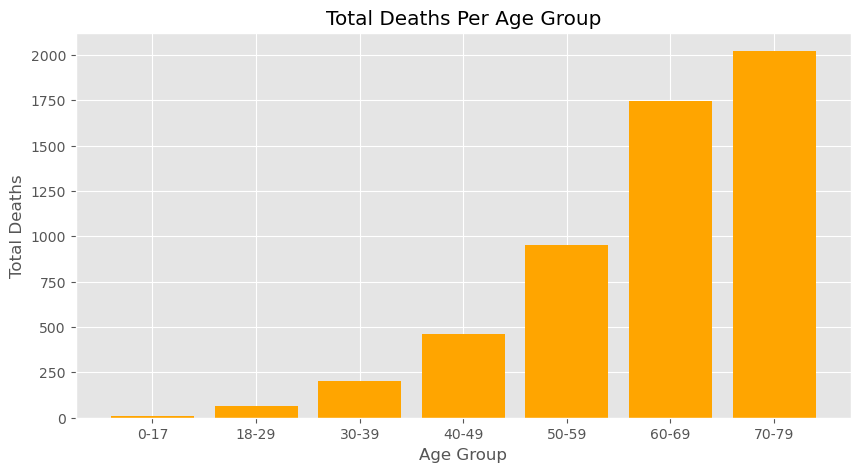

<br><br>

Interestingly, we see that as age increases, there is a higher chance of death, especially going into the 70-79 age range.

This proves my hypothesis that higher age groups have the higher chance of death.

### Hospitilizations 

<br>

**1. Is there a certain sex that was more prone to hospitilizations?**

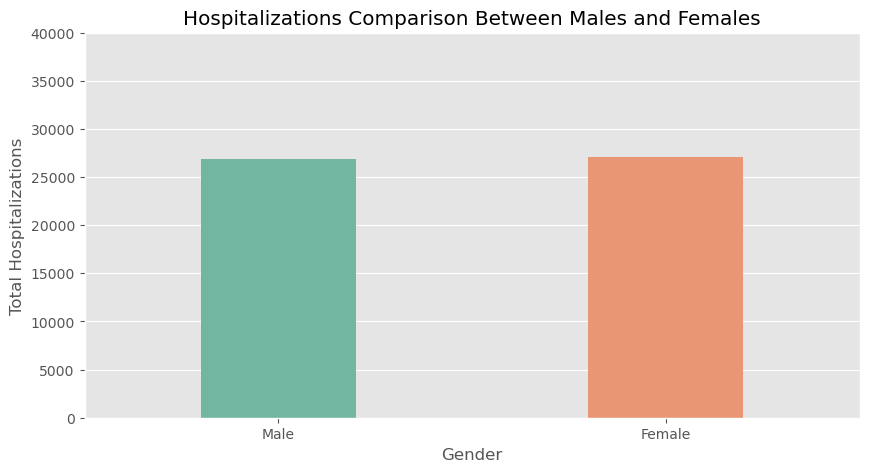

We can see that sex does not necessarily determine who is more prone to hospitilizations. 

There is only a slight higher hospitilization count for females.

<br><br>

**2. Which race saw the most hospitilizations?**

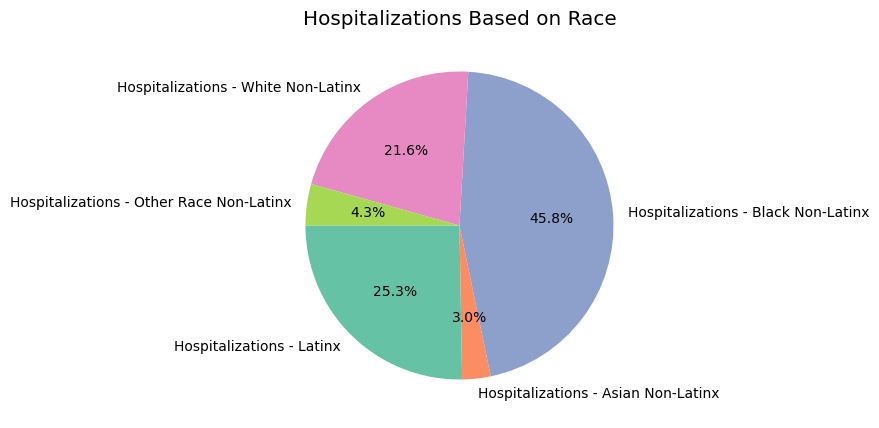

Based on the pie chart we can see the hospitalizations based on race as:

* **Black Non-Latinx**: 45.8%
* **Latinx**: 25.3%
* **White Non-Latinx**: 21.6%
* **Other Race Non-Latinx**: 4.3%
* **Asian Non-Latinx**: 3.0%